In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from bokeh.plotting import figure, output_notebook, show, ColumnDataSource
%matplotlib inline
output_notebook()

Loading BokehJS ...

In [2]:
#pull our data in
flights_clean=pd.read_csv('flights_clean.csv', encoding='utf-8', index_col=0, dtype={'ORIGIN_AIRPORT':str, 'DESTINATION_AIRPORT':str, 'SCHEDULED_DEPARTURE':int, 'DEPARTURE_TIME':str, 'WHEELS_OFF':str, 'WHEELS_ON':str, 'SCHEDULED_ARRIVAL':str, 'ARRIVAL_TIME':str, 'DIVERTED':bool, 'CANCELLED':bool})
flights_clean["YEAR_MONTH_DAY"] = pd.to_datetime(flights_clean["YEAR_MONTH_DAY"])
flights_clean.head()

/Users/claireramming/Applications/anaconda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:395: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,YEAR_MONTH_DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015-01-01,4,AS,98,N407AS,ANC,SEA,5,2354,-11.0,...,0408,-22.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-01,4,AA,2336,N3KUAA,LAX,PBI,10,0002,-8.0,...,0741,-9.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-01,4,US,840,N171US,SFO,CLT,20,0018,-2.0,...,0811,5.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-01-01,4,AA,258,N3HYAA,LAX,MIA,20,0015,-5.0,...,0756,-9.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-01-01,4,AS,135,N527AS,SEA,ANC,25,0024,-1.0,...,0259,-21.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#flights_delayed=flights_clean[(flights_clean.DEPARTURE_DELAY > 0) & (flights_clean.ARRIVAL_DELAY >= 15)]
#flights_normal = flights_clean(flights_clean.DEPARTURE_DELAY < 0)

TypeError: 'DataFrame' object is not callable

In [4]:
flights_clean.time_made_up = flights_clean.DEPARTURE_DELAY - flights_clean.ARRIVAL_DELAY #positive means the flight made up some time
flights_clean.time_made_up.head()

0    11.0
1     1.0
2    -7.0
3     4.0
4    20.0
dtype: float64

In [5]:
np.random.seed(100)
departure_delay = np.random.choice(flights_clean.DEPARTURE_DELAY, 10000, replace=False)
np.random.seed(100)
time = np.random.choice(flights_clean.time_made_up, 10000, replace=False)


source = ColumnDataSource( dict(
 x = departure_delay,
 y = time,
))



p = figure(width=700, height=500, tools='', title='Difference in Arrival and Departure Delay by Departure Delay', 
           x_axis_label ='Departure Delay', y_axis_label='time made up in flight')
p.circle(x='x', y='y', size=7, color='blue', alpha=0.2, source = source)

show(p)

In [6]:
not_delayed = flights_clean[(flights_clean.DEPARTURE_DELAY < 30) & (flights_clean.ARRIVAL_DELAY.notnull())]
not_delayed.time_made_up = not_delayed.DEPARTURE_DELAY - not_delayed.ARRIVAL_DELAY
delayed = flights_clean[(flights_clean.DEPARTURE_DELAY >= 30) & (flights_clean.ARRIVAL_DELAY.notnull())]
delayed.time_made_up = delayed.DEPARTURE_DELAY - delayed.ARRIVAL_DELAY

In [7]:
np.random.seed(150)
not_delayed_time = np.random.choice(not_delayed.time_made_up, 10000, replace=False)
np.random.seed(165)
delayed_time = np.random.choice(delayed.time_made_up, 10000, replace=False)

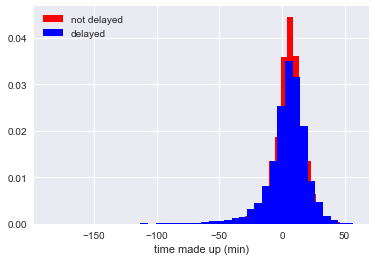

In [23]:
_ = plt.hist(not_delayed_time, bins=40, normed=True, color='r', label='not delayed')
_ = plt.hist(delayed_time, bins=40, normed=True, color='b', label='delayed')
_ = plt.xlabel('time made up (min)')
_ = plt.legend()
plt.show()

In [9]:
diff_of_means = delayed_time.mean() - not_delayed_time.mean()
full_mean = flights_clean.time_made_up.mean()
print(diff_of_means, full_mean)

-0.9521 4.887784546328952


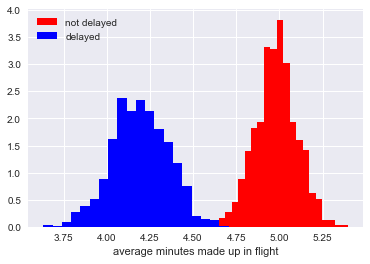

In [24]:
np.random.seed(150)
delayed_means = np.empty(1000)
not_delayed_means = np.empty(1000)

for i in range(1000):
    not_delayed_time = np.random.choice(not_delayed.time_made_up, 10000, replace=False)
    delayed_time = np.random.choice(delayed.time_made_up, 10000, replace=False)
    not_delayed_means[i] = not_delayed_time.mean()
    delayed_means[i] = delayed_time.mean()

_ = plt.hist(not_delayed_means, bins=20, normed=True, color='r', label='not delayed')
_ = plt.hist(delayed_means, bins=20, normed=True, color='b', label='delayed')
_ = plt.xlabel('average minutes made up in flight')
_ = plt.legend()
plt.show()

In [18]:
not_delayed_shifted = not_delayed.time_made_up - not_delayed.time_made_up.mean() + full_mean
delayed_shifted = delayed.time_made_up - delayed.time_made_up.mean() + full_mean

np.random.seed(89)
delayed_means = np.empty(1000)
not_delayed_means = np.empty(1000)

for i in range(1000):
    not_delayed_time = np.random.choice(not_delayed_shifted, 10000, replace=False)
    delayed_time = np.random.choice(delayed_shifted, 10000, replace=False)
    not_delayed_means[i] = not_delayed_time.mean()
    delayed_means[i] = delayed_time.mean()

diff = delayed_means - not_delayed_means
p = np.sum(diff <= diff_of_means)/len(diff)

print(p)

0.0
